In [2]:
!pip install mesa


     |████████████████████████████████| 675kB 8.4MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 


In [3]:

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid,SingleGrid

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector

import numpy as np

In [ ]:


class UltimatumAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model,personality):
        super().__init__(unique_id, model)
        self.wealth = 10
        self.personality=personality #personality is a tuple (a,o)=(accept, offer)
        self.accept=personality[0] #accept at least a
        self.offer=personality[1] #offers o

    def step(self):
        #The agent's step will go here.
        #print ("Hi, I am agent " + str(self.unique_id) +"."+" My wealth is "+str(self.wealth))
        if self.wealth <= 0:
            self.model.schedule.remove(self)  #se va a 0 muore
            print("morto"+str(self.unique_id))
            print(self.personality)
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        if(other_agent.accept<=self.offer):#if the agree they both get money
          print(str(other_agent.unique_id)+" gets "+ str(100*self.offer)+" from "+str(self.unique_id))
          other_agent.wealth += 100*self.offer
          self.wealth += 100*(1-self.offer)
        
        print(str(other_agent.unique_id)+" gets nothing from"+str(self.unique_id))

        #print("Steps"+str(self.model.num_steps))
        #here is life expenses what changes if i put this at the beginning? what if I increase to cost with passing of time
        self.wealth -= 1 *self.model.num_steps  

In [6]:


class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.num_steps=0
        self.schedule = RandomActivation(self)
        # Create agents
        #for i in range(self.num_agents):
        temp = np.array([0.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
        y=[[x0, y0] for x0 in temp for y0 in temp]
        for k in range(N):
            a = UltimatumAgent(k, self,y[k])
            self.schedule.add(a)

        self.datacollector = DataCollector(
            #model_reporters={"Gini": compute_gini},  # `compute_gini` defined above
            agent_reporters={"Wealth": "wealth","Personality":"personality"})

    def step(self):
        '''Advance the model by one step.'''
        self.num_steps+=1
        
        self.datacollector.collect(self)
        self.schedule.step()



In [73]:
#

In [7]:
model = MoneyModel(100)
for i in range(100):
    model.step()
    #if(model.step()==999):
     # print(model.schedule.get_agent_count())
     # print(model.schedule.agents.accept)

Output streaming troncato alle ultime 5000 righe.
50 gets nothing from39
76 gets 80.0 from 67
76 gets nothing from67
50 gets 60.0 from 35
50 gets nothing from35
79 gets 80.0 from 47
79 gets nothing from47
0 gets 10.0 from 20
0 gets nothing from20
79 gets nothing from85
14 gets 40.0 from 23
14 gets nothing from23
62 gets nothing from81
81 gets nothing from26
84 gets nothing from11
31 gets 50.0 from 34
31 gets nothing from34
21 gets 90.0 from 28
21 gets nothing from28
28 gets nothing from1
72 gets nothing from24
48 gets 70.0 from 86
48 gets nothing from86
35 gets 50.0 from 74
35 gets nothing from74
37 gets 80.0 from 17
37 gets nothing from17
7 gets 70.0 from 76
7 gets nothing from76
22 gets 90.0 from 18
22 gets nothing from18
45 gets 50.0 from 4
45 gets nothing from4
88 gets 90.0 from 58
88 gets nothing from58
57 gets 90.0 from 48
57 gets nothing from48
39 gets 40.0 from 83
39 gets nothing from83
62 gets nothing from41
66 gets 70.0 from 6
66 gets nothing from6
51 gets nothing from13
52 g

In [89]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth

Wealth Personality
Step AgentID                    
0    0          10.0  [0.1, 0.1]
     1          10.0  [0.1, 0.2]
     2          10.0  [0.1, 0.3]
     3          10.0  [0.1, 0.4]
     4          10.0  [0.1, 0.5]
...              ...         ...
99   66        390.0  [0.7, 0.7]
     67        660.0  [0.7, 0.8]
     73        650.0  [0.8, 0.4]
     76        970.0  [0.8, 0.7]
     83        160.0  [0.9, 0.4]

[8780 rows x 2 columns]

In [90]:


class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model,personality):
        super().__init__(unique_id, model)
        self.wealth = 10
        self.personality=personality #personality is a tuple (a,o)=(accept, offer)
        self.accept=personality[0] #accept at least a
        self.offer=personality[1] #offers o

    def step(self):
        #The agent's step will go here.
        #print ("Hi, I am agent " + str(self.unique_id) +"."+" My wealth is "+str(self.wealth))
        if self.wealth <= 0:
            self.model.schedule.remove(self)  #se va a 0 muore
            print("morto"+str(self.unique_id))
            print(self.personality)
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        if(other_agent.accept<=self.offer):#if the agree they both get money
          print(str(other_agent.unique_id)+" gets "+ str(100*self.offer)+" from "+str(self.unique_id))
          other_agent.wealth += 100*self.offer
          self.wealth += 100*(1-self.offer)
        
        print(str(other_agent.unique_id)+" gets nothing from"+str(self.unique_id))

        #print("Steps"+str(self.model.num_steps))
        #here is life expenses what changes if i put this at the beginning? what if I increase to cost with passing of time
        self.wealth -= 1 *self.model.num_steps  summary=agent_wealth.reset_index()
summary.iloc[100,:]

Step                    1
AgentID                 0
Wealth                  9
Personality    [0.1, 0.1]
Name: 100, dtype: object

In [91]:
summary.tail()

,Step,AgentID,Wealth,Personality
8775,99,66,390.0,"[0.7, 0.7]"
8776,99,67,660.0,"[0.7, 0.8]"
8777,99,73,650.0,"[0.8, 0.4]"
8778,99,76,970.0,"[0.8, 0.7]"
8779,99,83,160.0,"[0.9, 0.4]"


In [92]:
summary[summary["Step"]==99].sort_values(by=["Wealth"],ascending=False)

,Step,AgentID,Wealth,Personality
8718,99,2,4350.0,"[0.1, 0.3]"
8739,99,23,4050.0,"[0.3, 0.4]"
8729,99,13,3840.0,"[0.2, 0.4]"
8721,99,5,3660.0,"[0.1, 0.6]"
8731,99,15,3580.0,"[0.2, 0.6]"
...,...,...,...,...
8735,99,19,360.0,"[0.2, 1.0]"
8754,99,39,260.0,"[0.4, 1.0]"
8779,99,83,160.0,"[0.9, 0.4]"
8746,99,30,150.0,"[0.4, 0.1]"


In [93]:
summary[summary["AgentID"]==96]

,Step,AgentID,Wealth,Personality
96,0,96,10.0,"[1.0, 0.7]"
196,1,96,39.0,"[1.0, 0.7]"
296,2,96,67.0,"[1.0, 0.7]"
396,3,96,94.0,"[1.0, 0.7]"
496,4,96,120.0,"[1.0, 0.7]"
592,5,96,145.0,"[1.0, 0.7]"
688,6,96,169.0,"[1.0, 0.7]"
784,7,96,192.0,"[1.0, 0.7]"
880,8,96,184.0,"[1.0, 0.7]"
976,9,96,275.0,"[1.0, 0.7]"


(array([14., 13., 11., 14., 12.,  3.,  5.,  2.,  0.,  1.]),
 array([ 10.,  43.,  76., 109., 142., 175., 208., 241., 274., 307., 340.]),
 <a list of 10 Patch objects>)

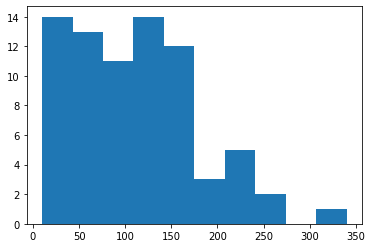

In [16]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

In [ ]:
from mesa.space import MultiGrid,SingleGrid

from mesa import Agent, Model
from mesa.time import RandomActivation

In [68]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        #new_position = self.random.choice(possible_steps) si muove in una posizione a fianco
        #self.model.grid.move_agent(self, new_position)
        self.model.grid.move_to_empty(self) #si muove in una posizione dove non c'è nessuno


    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents each one with different personality
       
    """

    def __init__(self, N, width, height):
        self.num_agents = N
        self.num_steps=0
        
        temp = np.array([0.1,.])
        pers=[[x0, y0] for x0 in x for y0 in x]

        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            pos = self.grid.find_empty()
            #print(pos)
            self.grid.place_agent(a, pos)

    def step(self):
        self.num_steps+=1
        print("Steps"+self.num_)
        self.schedule.step()

SyntaxError: ignored

In [ ]:
#model with 50 agents in a grid 10X10
model = MoneyModel(50, 10, 10)
#20 steps

In [ ]:

for i in range(2):
    model.step()

In [ ]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()


In [ ]:
np.arange(0.1, 1.1, 0.1)

In [ ]:
np.meshgrid(np.arange(0.1, 1.1, 0.1),np.arange(0.1, 1.1, 0.1))

In [ ]:
x = np.array([0.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
y=[[x0, y0] for x0 in x for y0 in x]

In [ ]:
np.length(y)

In [ ]:
len(y)